In [1]:
import cv2
#import matplotlib.pyplot as plt

import numpy as np
#from scipy import sparse
#from scipy.sparse.linalg import spsolve

from scipy.interpolate import RBFInterpolator, bisplev, interp1d



In [19]:
image = cv2.imread('grid.png')
#plt.imshow(image)
image.shape


(598, 644, 3)

In [8]:
#I1_features = np.array([[20, 20], [20, 40], [70, 30]], dtype=np.float32)
#I2_features = np.array([[20, 20], [20, 40], [70, 20]], dtype=np.float32)

time_steps = 20

I1_features = np.array([(10, 10), (100, 100), (50, 100), (200, 30), (60, 20), (150, 200), (120, 90)], dtype=np.float32)
I2_features = np.array([(15, 5), (110, 105), (55, 105), (190, 35), (70, 20), (155, 205), (115, 195)], dtype=np.float32)

#interpolate between each pair of points in a linear way
def create_linear_interpolations(image1_features, image2_features, time_steps):

    I1_feature_positions = np.zeros((time_steps, I2_features.shape[0], 2), dtype=np.float32)
    I2_feature_positions = np.zeros((time_steps, I2_features.shape[0], 2), dtype=np.float32)

    for featureN, (f1, f2) in enumerate(zip(I1_features, I2_features)):

        x1, x2 = f1[0], f2[0]
        y1, y2 = f1[1], f2[1]

        #interpolate the points between the start and the destination to create middle warps
        feature_interpolants_x = np.linspace(x1, x2, time_steps, endpoint=True)
        feature_interpolants_y = np.linspace(y1, y2, time_steps, endpoint=True)

        I1_feature_positions[:, featureN, 0] = feature_interpolants_x
        I1_feature_positions[:, featureN, 1] = feature_interpolants_y

        I2_feature_positions[:, featureN, 0] = np.flip(feature_interpolants_x)
        I2_feature_positions[:, featureN, 1] = np.flip(feature_interpolants_y)
        
    return I1_feature_positions, I2_feature_positions

I1_feature_positions, I2_feature_positions = create_linear_interpolations(I1_features, I2_features, time_steps)

In [14]:


def create_warpers(I1_feature_positions, I2_feature_positions):
    
    warpers = []
    matches = [cv2.DMatch(i, i, 0) for i in range(len(I1_features))]

    start_feature_positions = I1_feature_positions[0].reshape(1, -1, 2)
    final_feature_positions = I2_feature_positions[time_steps - 1].reshape(1, -1, 2)

    #calculate all the middle middle steps between I1_featueres and I2_features
    for t in range(0, time_steps):

        features_I1 = (I1_feature_positions[t]).reshape(1, -1, 2)
        features_I2 = (I2_feature_positions[t]).reshape(1, -1, 2)

        W1t = cv2.createThinPlateSplineShapeTransformer()
        W1t.estimateTransformation(features_I1, final_feature_positions, matches)

        W2t = cv2.createThinPlateSplineShapeTransformer()
        W2t.estimateTransformation(features_I2, start_feature_positions, matches)

        warpers.append(tuple((W1t, W2t)))

    warpers.reverse()
    return warpers

#warped_images.append(tuple((W1t.warpImage(image), W2t.warpImage(image))))
warped

20


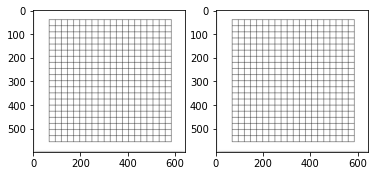

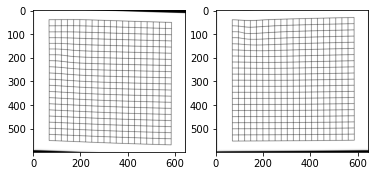

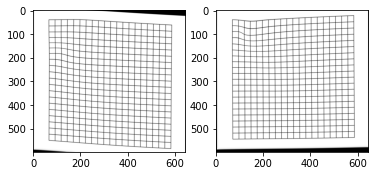

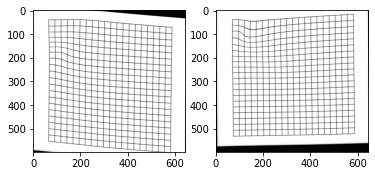

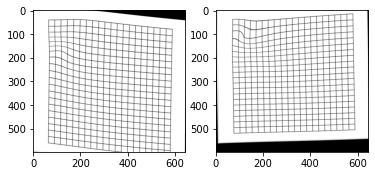

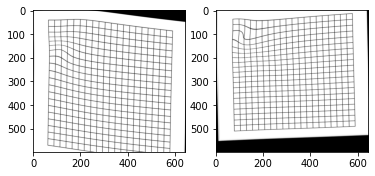

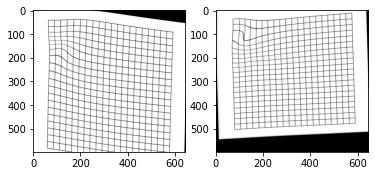

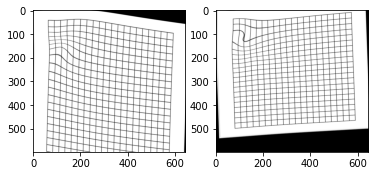

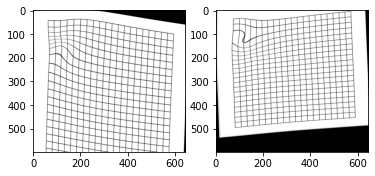

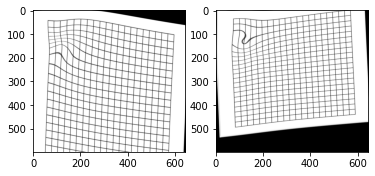

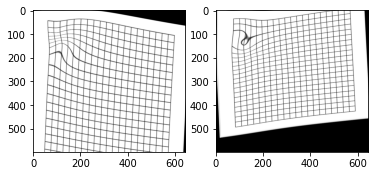

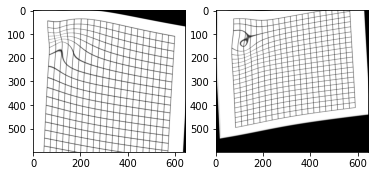

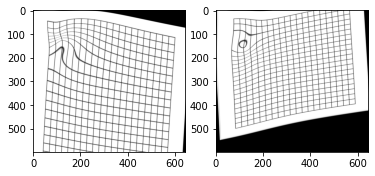

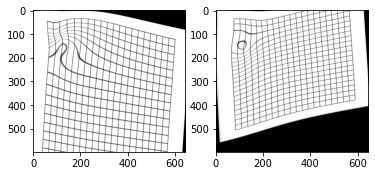

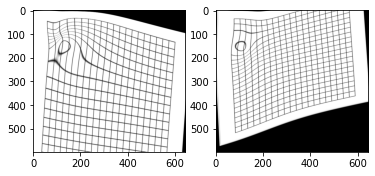

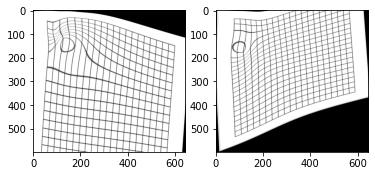

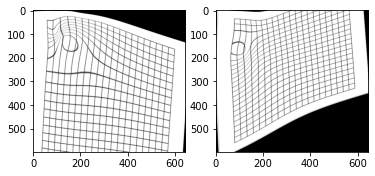

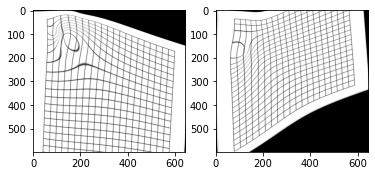

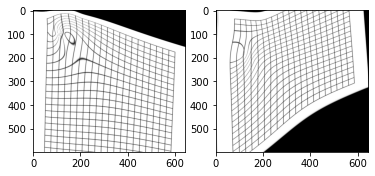

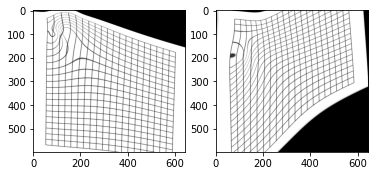

In [12]:
#print(len(warped_images))



'''
for image1, image2 in warped_images:
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(image1)
    axarr[1].imshow(image2)
    #plt.imshow(image1)
    plt.show()
    
'''